In [1]:
#라이브러리 import
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
# 파일 선택 및 DATAFRAME
df = pd.read_csv(r"C:\Users\chongs\cpk_calculator\12_Gls.csv", engine = 'python')

In [34]:
df.describe()

,No,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,F,G,H,I,J,K,L,M,N,O
count,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,...,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000
mean,933.000000,1.187895,0.643033,0.796346,1.481651,1.161446,1.176859,1.129034,1.341959,1.140907,...,-0.678295,-0.353028,-1.089563,-0.497464,-0.453357,0.210863,0.684576,-1.029244,0.669579,-1.143076
std,535.059343,0.890331,0.545010,0.360861,0.796060,0.552444,0.710408,0.771884,0.863409,0.838895,...,1.069268,1.066295,0.916932,1.044331,0.932628,0.219977,0.928087,0.960267,0.430672,1.009728
min,7.000000,-0.700000,-1.270000,-1.280000,-0.330000,-0.770000,-0.560000,-0.720000,-0.300000,-0.590000,...,-4.980000,-3.980000,-5.310000,-4.590000,-4.860000,-2.460000,-3.360000,-5.250000,-2.670000,-5.260000
25%,470.000000,0.250000,0.250000,0.580000,0.750000,0.750000,0.570000,0.490000,0.450000,0.230000,...,-1.570000,-1.190000,-1.830000,-1.360000,-1.240000,0.140000,-0.100000,-1.800000,0.490000,-2.020000
50%,933.000000,1.480000,0.400000,0.700000,1.420000,0.930000,0.970000,0.920000,1.290000,1.090000,...,-0.690000,-0.420000,-1.050000,-0.510000,-0.440000,0.250000,0.770000,-1.060000,0.830000,-1.160000
75%,1396.000000,1.850000,1.010000,0.900000,2.120000,1.550000,1.800000,1.770000,2.110000,1.830000,...,0.330000,0.770000,-0.250000,0.500000,0.420000,0.340000,1.540000,-0.180000,1.000000,-0.190000
max,1859.000000,5.810000,4.930000,5.270000,5.500000,5.180000,5.300000,5.410000,5.500000,5.410000,...,1.180000,1.510000,0.870000,1.320000,1.200000,0.870000,2.360000,0.610000,1.180000,0.610000


In [35]:
#Calibration DATA 지우기
df = df[(df['판정.2'] != 'Calib')]

In [36]:
#edge curvature & surface curvature 구분
df_edge = df[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8',
       'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18',
       'P19', 'P20']]
df_surf = df[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N','O']]


In [37]:
df_surf_temp = df_surf.describe()

In [38]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

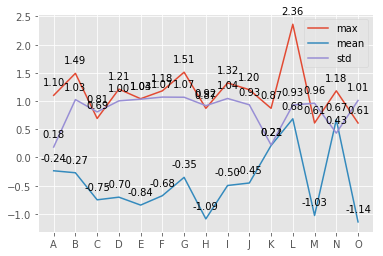

<Figure size 2160x720 with 0 Axes>

In [39]:
plt.plot(df_surf_temp.loc['max'])
plt.plot(df_surf_temp.loc['mean'])
plt.plot(df_surf_temp.loc['std'])
plt.legend()

for x,y in zip(df_surf_temp.loc['max'].index,df_surf_temp.loc['max']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
for x,y in zip(df_surf_temp.loc['mean'].index,df_surf_temp.loc['mean']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

for x,y in zip(df_surf_temp.loc['std'].index,df_surf_temp.loc['std']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.figure(figsize = (30,10))
plt.savefig('C:/Users/Chongs/Desktop/ck_std.jpg')



In [40]:
# CP, CPK,yield 구하는 함수 coding
def Cp(mylist, usl, lsl):
    arr = np.array(mylist)
    arr = arr.ravel()
    sigma = np.std(arr)
    Cp = float(usl - lsl) / (6*sigma)
    return Cp


def Cpk(mylist, usl, lsl):
    arr = np.array(mylist)
    arr = arr.ravel()
    sigma = np.std(arr)
    m = np.mean(arr)

    Cpu = float(usl - m) / (3*sigma)
    Cpl = float(m - lsl) / (3*sigma)
    Cpk = np.min([Cpu, Cpl])
    return Cpk

def get_yield(cpk):
    return norm.cdf(cpk * 3)


# if __name__ == "__main__":
#     #a1 = np.random.randn(10)
#     #print a1
#     #print Cp(a1, 1, -1)
#     #print Cpk(a1, 1, -1)
#     for i in df_rr.columns:
#         a1 = df_rr[i]
#         b1 = Cp(a1, 1, -1)
#         b2 = Cpk(a1, 1, -1)
#         a2.append([b1,b2])
        

In [41]:
#Edge curvature 계산
edge = []
for i in df_edge.columns:
    a1 = df_edge[i]
    
    cp = Cp(a1,1.5,-1.5)
    cpk = Cpk(a1,1.5,-1.5)
    yield_rate = get_yield(cpk)
    case = {'cp': cp, 'cpk': cpk, 'yield':yield_rate}
    edge.append(case)
#     edge.append([cp,cpk,yield_rate])


In [42]:
#surface curvature 계산
surf = []
for i in df_surf.columns:
    a1 = df_surf[i]
    
    cp = Cp(a1,3,-3)
    cpk = Cpk(a1,3,-3)
    yield_rate = get_yield(cpk)
#     surf.append([cp,cpk,yield_rate])
    case = {'cp': cp, 'cpk': cpk, 'yield':yield_rate}
    surf.append(case)


In [43]:
#계산결과 데이터프레임으로 만들기
surf = pd.DataFrame(surf)
edge = pd.DataFrame(edge)

In [44]:
# 각 index list 생성
list_edge = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8',
       'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18',
       'P19','P20']
list_surf = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N','O']
list_edge = pd.DataFrame(list_edge)
list_surf = pd.DataFrame(list_surf)

In [45]:
#Index와 계산 결과 합치기
surf = pd.concat([list_surf,surf], axis=1)
edge = pd.concat([list_edge,edge], axis=1)


In [46]:
surf.set_index(0, inplace = True)

In [47]:
surf = surf.transpose()

In [49]:
surf.loc['cpk'].index

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O'],
      dtype='object', name=0)

No handles with labels found to put in legend.


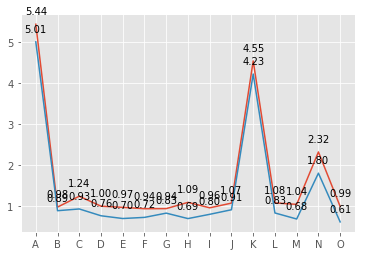

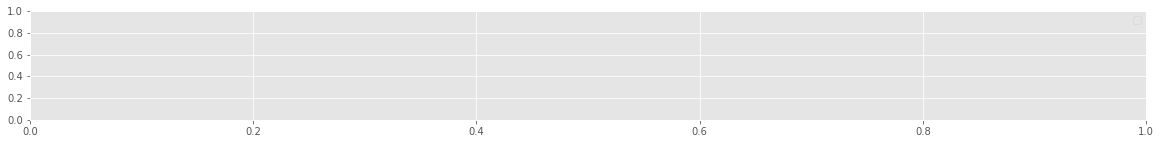

In [50]:
plt.plot(surf.loc['cp'])
plt.plot(surf.loc['cpk'])

for x,y in zip(surf.loc['cpk'].index,surf.loc['cpk']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
for x,y in zip(surf.loc['cp'].index,surf.loc['cp']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.figure(figsize = (20,2))
plt.legend()


In [51]:
#두 결과 합치기
df_new = pd.concat([edge,surf])

C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [52]:
df_new.head()

,0,cp,cpk,yield,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,P1,1.229101,0.954206,0.997899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P2,0.639515,0.633804,0.971376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P3,4.447015,4.432072,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P4,3.722905,3.331367,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P5,3.025109,2.892263,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df_new.set_index(0)

,cp,cpk,yield,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,,,,,,,,,,,,,,,,,,
P1,1.229101,0.954206,0.997899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P2,0.639515,0.633804,0.971376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P3,4.447015,4.432072,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P4,3.722905,3.331367,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P5,3.025109,2.892263,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P6,1.435763,1.433387,0.999991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P7,1.956055,1.720667,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P8,4.373318,3.819002,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P9,3.113720,2.621866,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
a = df_new.iloc[:,1]

In [55]:
df = df_new.transpose()

In [56]:
np.average(a)

nan

In [57]:
np.min(a)

0.6395148845154948

In [58]:
x = df_new.iloc[0:20,0]
y = df_new.iloc[0:20,1]

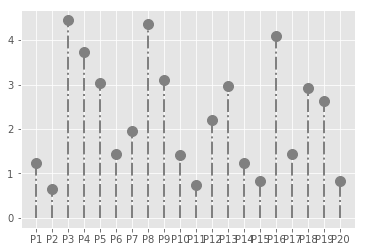

In [60]:
markerline, stemlines, baseline = plt.stem(x, y, '-.')
a= plt.setp(baseline, linewidth=0)
b=plt.setp(markerline, marker='o', color='grey', linewidth=2, markersize = 10)
c=plt.setp(stemlines, color='grey', linewidth=2, markersize = 10)

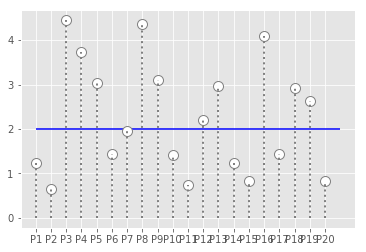

In [61]:
markerline, stemlines, baseline = plt.stem(x, y, '-.')
a= plt.setp(baseline, linewidth=0)
b=plt.setp(markerline, marker='o', color='white', linewidth=2, markersize = 10, markeredgecolor = 'grey')
c=plt.setp(stemlines, color='grey', linewidth=2, markersize = 10, linestyle = ':')
plt.hlines(y = 2, xmin = 0, xmax = 20, color = 'blue')


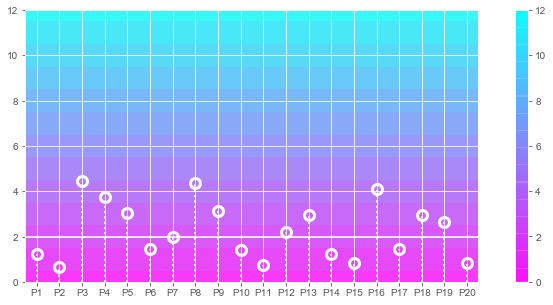

In [62]:
import numpy as np
import matplotlib.pyplot as plt

N = 37
bgx, bgy = np.mgrid[:20, :13]
Z = bgy


Zpos = np.ma.masked_less(Z, 0)
Zneg = np.ma.masked_greater(Z, 0)

fig, (ax1) = plt.subplots(figsize=(13, 5), ncols=1)
pos = ax1.imshow(Zpos.T, cmap='cool_r',alpha = 0.75, interpolation='none')
fig.colorbar(pos, ax=ax1)

markerline, stemlines, baseline = plt.stem(x, y, '-.')
a= plt.setp(baseline, linewidth=0)
b=plt.setp(markerline, marker='o', color='None', linewidth=2, markeredgewidth=3, markersize = 10, markeredgecolor = 'white')
c=plt.setp(stemlines, color='white', linewidth=2, markersize = 10, linestyle = ':')
plt.hlines(y = 2, xmin = -1, xmax = 20, color = 'white')
plt.ylim([0,12])
plt.xlim([-0.5,19.5])

import seaborn as sns
sns.set_style('white')

In [66]:
df_new = df_new.transpose()

In [67]:
#Excel로 output
df_new.to_csv(r"C:\Users\chongs\cpk_calculator\결과1.csv")